In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import spacy

import pattern
from pattern.en import lemma, lexeme

from wordcloud import WordCloud, STOPWORDS

In [2]:
alexa_df = pd.read_csv('amazon_alexa.csv')
alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
print(alexa_df.shape)
alexa_df['rating'].value_counts(normalize=True)

(3150, 5)


5    0.725714
4    0.144444
1    0.051111
3    0.048254
2    0.030476
Name: rating, dtype: float64

In [4]:
alexa_df['length'] = alexa_df['verified_reviews'].apply(len)
alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [5]:
# # change rating=3 to neutral, above 3 to positive, and below 3 to negative

# # alexa_df['rating'] = alexa_df.replace(alexa_df['rating']==3, 'neutral')
# alexa_df['rating'] = np.where(alexa_df['rating']>=4, 'positive','negative')

# alexa_df.head()

In [6]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

alexa_df['reviews'] = alexa_df['verified_reviews'].map(alphanumeric).map(punc_lower)
alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes while playing a game you can answer...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,i have had a lot of fun with this thing my ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music


In [7]:
alexa_df['reviews']

0                                           love my echo 
1                                               loved it 
2       sometimes while playing a game  you can answer...
3       i have had a lot of fun with this thing  my   ...
4                                                   music
5       i received the echo as a gift  i needed anothe...
6       without having a cellphone  i cannot use many ...
7       i think this is the   one i ve purchased  i m ...
8                                             looks great
9       love it  i’ve listened to songs i haven’t hear...
10      i sent it to my   year old dad  and he talks t...
11      i love it  learning knew things with it eveyda...
12      i purchased this for my mother who is having k...
13                                     love  love  love  
14                               just what i expected    
15                              i love it  wife hates it 
16      really happy with this purchase   great speake...
17      we hav

In [8]:
stop = set(stopwords.words('english'))

stop_words = ['-PRON-','’s','be','"','“','’','u','—','','get','would' ]

# def remove_stops(comment):
#     stop_free = " ".join([i for i in comment.split() if i not in stop])
#     alexa_stop_free =" ".join([i for i in stop_free if i not in stop_words])
#     return alexa_stop_free

def remove_stops(comment):
    stop_free = [i for i in comment.split() if i not in stop]
    got_stop_free = " ".join([i for i in stop_free if i not in stop_words])
    return got_stop_free

alexa_df['reviews']= alexa_df['reviews'].apply(remove_stops)

In [9]:
alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learns dinosaurs control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music


In [10]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])   

alexa_df['reviews']= alexa_df['reviews'].apply(space)

In [11]:
alexa_df['reviews']

0                                               love echo
1                                                    love
2       sometimes play game answer question correctly ...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
5       receive echo gift need another bluetooth somet...
6       without cellphone can not use many feature ipa...
7       think one purchase work get one every room hou...
8                                              look great
9       love -PRON- have listen song have not hear sin...
10                      send year old dad talk constantly
11      love learn know thing eveyday still figure eve...
12      purchase mother knee problem give something tr...
13                                         love love love
14                                                 expect
15                                         love wife hate
16           really happy purchase great speaker easy set
17      use al

In [12]:
pickle.dump(alexa_df, open("alexa_cleaned.pkl", "wb" ))

In [13]:
#Remove 3 star reviews
alexa_df = alexa_df[alexa_df['rating']!=3]

# Set 4/5 star reviews to positive, the rest to negative
alexa_df['sentiment'] = np.where(alexa_df['rating']>= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
# data = data[['sentiment', 'reviews']]
alexa_df.shape

alexa_df.sentiment.value_counts(normalize=True)

positive    0.914276
negative    0.085724
Name: sentiment, dtype: float64

In [14]:
pickle.dump(alexa_df, open("alexa_cleaned_sentiment.pkl", "wb" ))

In [15]:
#create dictionary to do a count
count_dict_alex = {}

for doc in alexa_df['reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

dinosaur: 1
category: 1
grandaughter: 1
mile: 1
duty: 1
boost: 1
definitively: 1
input: 1
select: 1
encyclopedias: 1
dislikes: 1
spoken: 1
promp: 1
poop: 1
outsmart: 1
divertido: 1
information​: 1
iove: 1
fm: 1
speech: 1
native: 1
whose: 1
texas: 1
birth: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
dust: 1
collector: 1
satisfy: 1
receiving: 1
acknowledge: 1
indicate: 1
productsand: 1
journey: 1
surely: 1
portion: 1
leary: 1
puny: 1
wear: 1
tear: 1
mint: 1
teenager: 1
insist: 1
simplicity: 1
gazebo: 1
diagnostic: 1
roomba: 1
sentence: 1
shock: 1
clone: 1
boat: 1
garage: 1
gf: 1
intermittently: 1
pulsate: 1
pulse: 1
buddy: 1
psychological: 1
excellently: 1
whe: 1
recondition: 1
pare: 1
weary: 1
actively: 1
release: 1
widespread: 1
prevent: 1
cortna: 1
alive: 1
thumb: 1
workreat: 1
spank: 1
wherever: 1
cordthank: 1
brandnew: 1
output: 1
vintage: 1
longevity: 1
bough: 1
🏾: 1
detect: 1
electronically: 1
savy: 1
sink: 1
refurbishedthought: 1
closed: 1
backyard: 1
junk: 1
soft: 1
laud: 1

card: 9
please: 9
excite: 9
blast: 9
roku: 9
laugh: 10
improvement: 10
podcast: 10
digital: 10
siri: 10
kindle: 10
grocery: 10
surprise: 10
line: 10
integrate: 10
routine: 10
design: 10
cover: 10
later: 10
intuitive: 10
unless: 10
interface: 10
installation: 10
today: 10
amazed: 10
figured: 10
potential: 10
worry: 10
concern: 10
bathroom: 10
replacement: 10
wi: 10
fi: 10
instal: 10
last: 10
complain: 10
software: 10
research: 10
louder: 10
message: 10
microphone: 10
stereo: 10
guy: 10
ok: 10
slow: 10
world: 10
hand: 10
space: 10
customer: 10
anyone: 10
dad: 11
toy: 11
short: 11
frustrating: 11
playing: 11
load: 11
alexia: 11
savvy: 11
outlet: 11
wireless: 11
simply: 11
begin: 11
setting: 11
perform: 11
nee: 11
fault: 11
range: 11
kasa: 11
automation: 11
ago: 11
useless: 11
upstairs: 11
adapter: 11
spend: 11
blue: 11
cord: 11
activate: 11
version: 11
deliver: 11
fall: 11
pair: 11
selection: 11
oh: 11
idea: 11
via: 11
other: 12
sync: 12
traffic: 12
gadget: 12
within: 12
outside: 12
liste

In [16]:
low_value = 20
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [17]:
corpus = [doc.split() for doc in alexa_df['reviews']]
#a list of lists where each document is a string broken into a list of words
clean_corpus_alex = []
for document in corpus:
    clean_corpus_alex.append([word for word in document if word not in bad_words])

### Visualization

#### Wordcloud

In [18]:
corpus_cloud = ' '.join(alexa_df['reviews'])

In [19]:
STOPWORDS.update(['PRON'])

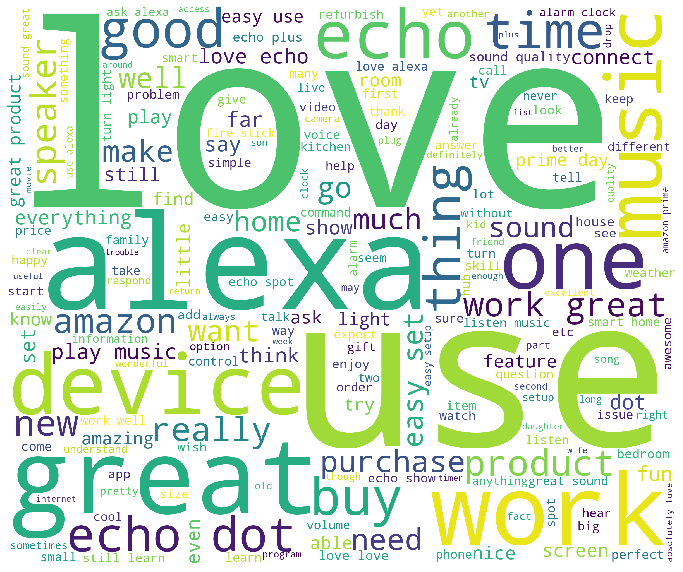

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

# https://mubaris.com/posts/dataviz-wordcloud/
#plt.savefig("wordcloud.jpg")
plt.show()

#### Graph for rating count

In [21]:
alexa_df['rating'].value_counts()

5    2286
4     455
1     161
2      96
Name: rating, dtype: int64